# Objectives

1. Find out how cyclical a stock is. (Code Assistance)
    1. Get S&P500 PRICE (10y period, 1d interval)
    2. Get all S&P500 indices
    3. Get all indices PRICE (10y period, 1d interval)
    4. Standardize, calculate r
    5. Order by r, analyze top & bottom performers
   
   
NOTES

Test percentage change and if it affects r
    
2. Find out if S&P500 holds predictive powers for all test stocks. (Predictive code assistance)
    1. Offset S&P500 by 5d / 1d
    2. Standardize, plot, r, order
    3. If success, interpret results
    
    
3. Test newsparsing
[...] To be developed


NOTES

Analysis into other metrics - frequency of being updated

Analysis into quarterly report effect



## Modules


In [2]:
#Get Data
import yfinance as yf
import bs4 as bs
import requests

#Visualize Data
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

#Manipulate Data
from numpy import *
from numpy.random import *
from datascience import *
import pandas as pd

#Other
from datetime import datetime
import time

#Style setup
plt.style.use('bmh')
%matplotlib inline

# Force display of all values INACTIVE
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm


## Stock Historical

1. Basis of analysis. Historical stock price data collected and returned with start date.


In [13]:
def parse_prefix(line, fmt):
    try:
        t = time.strptime(line, fmt)
    except ValueError as v:
        if len(v.args) > 0 and v.args[0].startswith('unconverted data remains: '):
            line = line[:-(len(v.args[0]) - 26)]
            t = time.strptime(line, fmt)
        else:
            raise
    return t

def historical(stock, period, interval, tm_val):
    #valid TM_VAL: date, time
    # valid PERIOD: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # valid INTERVAL: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    
    #Fetch data
    price_history = yf.download(tickers=stock, period=period, interval=interval, progress=False) # period: Smallest subdivision, interval: Time frame

    time_series = list(price_history['Open'])
    time_series_h = list(price_history['High'])
    time_series_l = list(price_history['Low'])
    
    #Format time
    dt_list = make_array()
    
    first_day = ""
    first = 0
    for dt in list(price_history.index):
        if first == 0:
            first_day = str(dt)
        first += 1
        if tm_val == "date":
            date = parse_prefix(str(dt), '%Y-%m-%d %H:%M:%S')
            day = "{}-{}-{}".format(date[0], date[1], date[2])
            dt_list = append(dt_list, day)
        elif tm_val == "time":
            date = parse_prefix(str(dt), '%Y-%m-%d %H:%M:%S')
            day = "{}:{}".format(date[3], date[4])
            dt_list = append(dt_list, day)
            
    history = Table().with_columns({"Date": dt_list, "Valuation": time_series, "High": time_series_h, "Low": time_series_l})
    
    return first_day, history

### S&P500 Valuation

([<matplotlib.axis.XTick at 0x154c1ef40>,
 [Text(0.0, 0, '2022-5-9'),
  Text(14.0, 0, '2022-5-27'),
  Text(28.0, 0, '2022-6-17'),
  Text(42.0, 0, '2022-7-11'),
  Text(56.0, 0, '2022-7-29'),
  Text(70.0, 0, '2022-8-18'),
  Text(84.0, 0, '2022-9-8'),
  Text(98.0, 0, '2022-9-28'),
  Text(112.0, 0, '2022-10-18'),
  Text(126.0, 0, '2022-11-7'),
  Text(140.0, 0, '2022-11-28')])

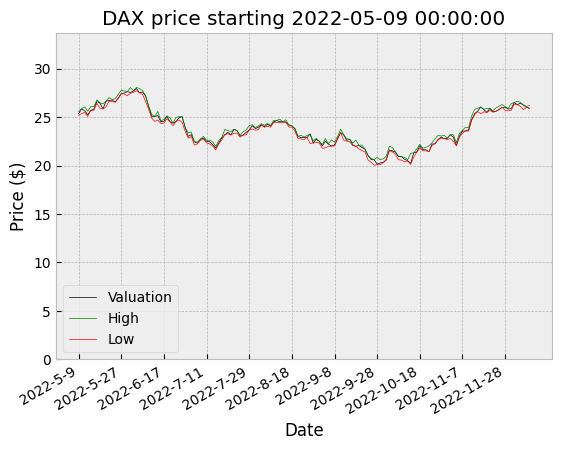

In [35]:
stock = "DAX"
period = "7mo"
interval = "1d"

stock_history_snp = historical(stock, period, interval, "date")

#Plotting
fig, ax = plt.subplots()
ax.plot(stock_history_snp[1].column("Date"), stock_history_snp[1].column("Valuation"), color="black", lw=0.5)
ax.plot(stock_history_snp[1].column("Date"), stock_history_snp[1].column("High"), color="green", lw=0.5)
ax.plot(stock_history_snp[1].column("Date"), stock_history_snp[1].column("Low"), color="red", lw=0.5)

#Formatting
plt.title("{} price starting {}".format(stock, stock_history_snp[0]))
plt.ylim([0, max(stock_history_snp[1].column("High"))*1.2])
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.gcf().autofmt_xdate()
plt.legend(["Valuation", "High", "Low"], loc='lower left')
plt.xticks(stock_history_snp[1].column("Date")[arange(0, len(stock_history_snp[1].column("Date")), int(len(stock_history_snp[1].column("Date"))/10))])

### Test Stock [Manipulate]

Block to analyze stock performance.

([<matplotlib.axis.XTick at 0x1550a5550>,
 [Text(0.0, 0, '2022-5-9'),
  Text(15.0, 0, '2022-5-30'),
  Text(30.0, 0, '2022-6-20'),
  Text(45.0, 0, '2022-7-11'),
  Text(60.0, 0, '2022-8-1'),
  Text(75.0, 0, '2022-8-22'),
  Text(90.0, 0, '2022-9-12'),
  Text(105.0, 0, '2022-10-3'),
  Text(120.0, 0, '2022-10-24'),
  Text(135.0, 0, '2022-11-14'),
  Text(150.0, 0, '2022-12-5')])

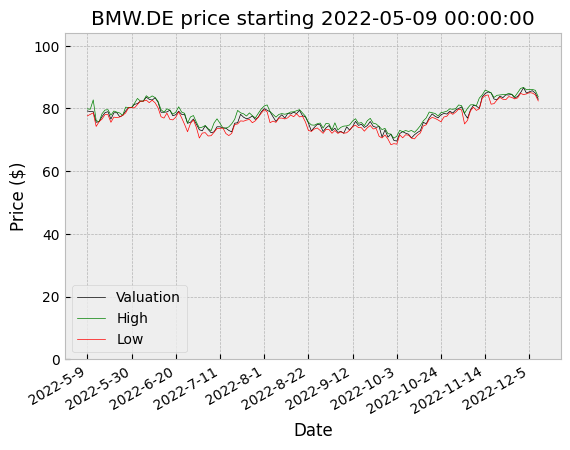

In [37]:
stock = "BMW.DE"
period = "7mo"
interval = "1d"

stock_history = historical(stock, period, interval, "date")

#Plotting
plt.plot(stock_history[1].column("Date"), stock_history[1].column("Valuation"), color="black", lw=0.5)
plt.plot(stock_history[1].column("Date"), stock_history[1].column("High"), color="green", lw=0.5)
plt.plot(stock_history[1].column("Date"), stock_history[1].column("Low"), color="red", lw=0.5)
plt.gcf().autofmt_xdate()

#Formatting
plt.title("{} price starting {}".format(stock, stock_history[0]))
plt.ylim([0, max(stock_history[1].column("High"))*1.2])
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend(["Valuation", "High", "Low"], loc='lower left')
plt.gcf().autofmt_xdate()
plt.xticks(stock_history[1].column("Date")[arange(0, len(stock_history[1].column("Date")), int(len(stock_history[1].column("Date"))/10))])

### Correlation to S&P500

Single stock correlation test, standardizations visualized, regression displayed

ValueError: x and y must be the same size

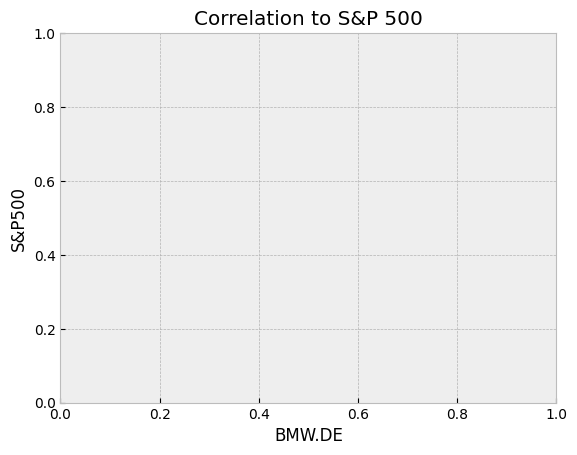

In [31]:
avr_hl_stock = (stock_history[1].column("High") + stock_history[1].column("Low"))/2
avr_stock = average(avr_hl_stock)
std_stock = std(avr_hl_stock)
stdized_hl_stock = (avr_hl_stock - avr_stock) / std_stock

avr_hl_snp = (stock_history_snp[1].column("High") + stock_history_snp[1].column("Low"))/2
avr_snp = average(avr_hl_snp)
std_snp = std(avr_hl_snp)
stdized_hl_snp = (avr_hl_snp - avr_snp) / std_snp

plt.title("Correlation to S&P 500")
plt.xlabel(stock)
plt.ylabel("S&P500")

plt.scatter(stdized_hl_stock, stdized_hl_snp, s=2)
r = average(stdized_hl_stock * stdized_hl_snp)

plt.plot([-2.5, 2.5], [-2.5*r, 2.5*r], color="black", lw=0.5)
r

## Best cyclical stock

1. Get S&P500 stocks

In [3]:
#Fetch S&P500 Stocks
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})

tickers = []

for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)
    
tickers = [s.replace('\n', '') for s in tickers]

tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCS

2. r collection + ranking

In [29]:
tickers_b = tickers

stock_arr = make_array()
r_arr = make_array()

#plt.title("Correlation to S&P 500")
#plt.xlabel(stock)
#plt.ylabel("S&P500")

for ticker in tickers_b:
    period = "10y"
    interval = "1d"
    stock_history = historical(ticker, period, interval, "tm_mday")
    
    avr_hl_stock = (stock_history[1].column("High") + stock_history[1].column("Low"))/2
    avr_stock = average(avr_hl_stock)
    std_stock = std(avr_hl_stock)
    stdized_hl_stock = (avr_hl_stock - avr_stock) / std_stock

    avr_hl_snp = (stock_history_snp[1].column("High") + stock_history_snp[1].column("Low"))/2
    avr_snp = average(avr_hl_snp)
    std_snp = std(avr_hl_snp)
    stdized_hl_snp = (avr_hl_snp - avr_snp) / std_snp
    
    try:
        #plt.scatter(stdized_hl_stock, stdized_hl_snp, s=2)
        r = average(stdized_hl_stock * stdized_hl_snp)
    
        stock_arr = append(stock_arr, ticker)
        r_arr = append(r_arr, r)
        
    except:
        print("{} size mismatch. Skipping.".format(ticker))
  
r_stock_table = Table().with_columns({"Stock": stock_arr, "r": r_arr})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ABBV size mismatch. Skipping.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[***

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
HPE size mismatch. Skipping.
[*********************100%***********************]  1 of 1 completed
HLT size mismatch. Skipping.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [30]:
r_stock_table.sort("r", descending=True).show()

Stock,r
APH,0.990353
ACN,0.990281
ADI,0.988737
MTD,0.988146
TXN,0.987484
SHW,0.985946
AME,0.985566
PKI,0.985321
HD,0.984808
GOOGL,0.984737


### Daily APH (0.99 correlation)

In [1]:
stock = "BMW.DE"
period = "1d"
interval = "10y"

APH_history_today = historical(stock, period, interval, "time")
SNP_history_today = historical("DAX", period, interval, "time")

APH = APH_history_today[1].column("Valuation")
APH_mean = mean(APH)
APH_std = std(APH)
APH_standardized = (APH - APH_mean) / APH_std

SNP = SNP_history_today[1].column("Valuation")
SNP_mean = mean(SNP)
SNP_std = std(SNP)
SNP_standardized = (SNP - SNP_mean) / SNP_std


#Plotting
plt.plot(APH_history_today[1].column("Date"), APH_standardized, color="blue", lw=0.5)
plt.plot(SNP_history_today[1].column("Date"), SNP_standardized, color="red", lw=0.5)
#plt.plot(APH_history_today[1].column("Date"), stock_history[1].column("High"), color="green", lw=0.5)
#plt.plot(stock_history[1].column("Date"), stock_history[1].column("Low"), color="red", lw=0.5)
plt.gcf().autofmt_xdate()

#Formatting
plt.title("{} price starting {}".format(stock, stock_history[0]))
#plt.ylim([0, max(APH_history_today[1].column("High"))*1.2])
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.legend([stock, "DAX"], loc='lower left')
plt.gcf().autofmt_xdate()
plt.xticks(APH_history_today[1].column("Date")[arange(0, len(APH_history_today[1].column("Date")), int(len(APH_history_today[1].column("Date"))/10))])

NameError: name 'historical' is not defined

In [32]:
r_stock_table.num_rows

462

### 5 Day S&P500 Correlation

In [33]:
tickers_c = tickers

stock_arr_5d = make_array()
r_arr_5d = make_array()

#plt.title("Correlation to S&P 500")
#plt.xlabel(stock)
#plt.ylabel("S&P500")

stock_history_snp_5d = historical("^GSPC", "10y", "5d", "date")

for ticker in tickers_c:
    period = "10y"
    interval = "5d"
    stock_history = historical(ticker, period, interval, "date")

    avr_hl_stock = (stock_history[1].column("High") + stock_history[1].column("Low"))/2
    avr_stock = average(avr_hl_stock)
    std_stock = std(avr_hl_stock)
    stdized_hl_stock = (avr_hl_stock - avr_stock) / std_stock

    avr_hl_snp = (stock_history_snp_5d[1].column("High") + stock_history_snp_5d[1].column("Low"))/2
    avr_snp = average(avr_hl_snp)
    std_snp = std(avr_hl_snp)
    stdized_hl_snp = (avr_hl_snp - avr_snp) / std_snp

    try:
        #plt.scatter(stdized_hl_stock, stdized_hl_snp, s=2)
        r = average(stdized_hl_stock * stdized_hl_snp)
    
        stock_arr_5d = append(stock_arr_5d, ticker)
        r_arr_5d = append(r_arr_5d, r)
        
    except:
        print("{} size mismatch. Skipping.".format(ticker))
  
r_stock_table_5d = Table().with_columns({"Stock": stock_arr_5d, "r": r_arr_5d})

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ABBV size mismatch. Skipping.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[***

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
HPE size mismatch. Skipping.
[*********************100%***********************]  1 of 1 completed
HLT size mismatch. Skipping.
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******************

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [35]:
r_stock_table_5d.sort("r", descending=True)

Stock,r
ACN,0.990621
APH,0.989705
ADI,0.988779
MTD,0.987907
TXN,0.987831
SHW,0.985788
PKI,0.985609
AME,0.985407
GOOGL,0.984859
GOOG,0.98475


Stock,r,r_2
APH,0.990353,0.989705
ACN,0.990281,0.990621
ADI,0.988737,0.988779
MTD,0.988146,0.987907
TXN,0.987484,0.987831
SHW,0.985946,0.985788
AME,0.985566,0.985407
PKI,0.985321,0.985609
HD,0.984808,0.984591
GOOGL,0.984737,0.984859


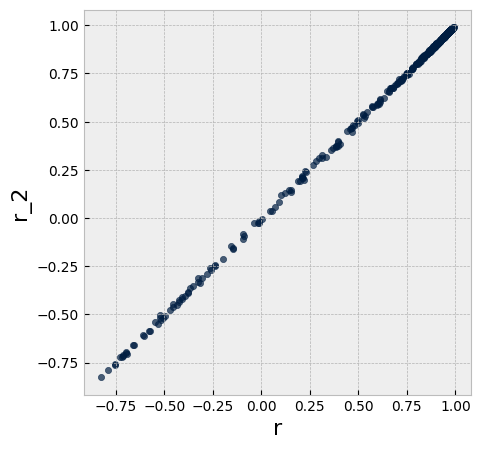

In [41]:
d1_d5_stock = r_stock_table.join("Stock", r_stock_table_5d)
d1_d5_stock.sort("r", descending=True).show(10)
d1_d5_stock.select("r", "r_2").scatter("r")

In [7]:
def percent_change(val_1, val_2):
    return (val_2 - val_1) / val_1

def standardize(arr_n):
    avr_stock = average(arr_n)
    std_stock = std(arr_n)
    stdized_stock = (arr_n - avr_stock) / std_stock
    return stdized_stock

def stock_price_to_percent(dict_n):
    avr_stock_a = dict_n[1].column("Valuation")
    percentage_stock_a = make_array()
    for i in range(0, len(avr_stock_a) - 1): 
        percentage_stock_a = append(percentage_stock_a, percent_change(avr_stock_a[i], avr_stock_a[i + 1]))
    return percentage_stock_a
    
def offset(stock_a, stock_b, period, interval, n):
    
    # Get data
    try:
        stock_a_hist = historical(stock_a, period, interval, "date")
        stock_b_hist = historical(stock_b, period, interval, "date")

        # Convert to percentage & standardize
        stock_a_perc = stock_price_to_percent(stock_a_hist)
        stock_b_perc = stock_price_to_percent(stock_b_hist)
    
        # Offset by n units
        stock_a_offset = stock_a_perc[:len(stock_a_perc)-n]
        stock_b_offset = stock_b_perc[n:]

        stock_a_std = standardize(stock_a_offset)
        stock_b_std = standardize(stock_b_offset)
    
        stock_compared = Table().with_columns(stock_a, stock_a_std, stock_b, stock_b_std)
    
        # stock_compared.scatter(stock_a)
    
        r = mean(stock_a_std * stock_b_std)
        return r
    
    except:
        return "nan"

In [9]:
#Stock A correlation to Stock B n intervals later

short_tick = tickers[0:50]

all_correlations = Table(make_array("Stock", "Predicting", "r"))
print("Starting")
for i in tqdm(short_tick):
    for j in short_tick:
        all_correlations = all_correlations.with_row([i, j, offset(i, j, "1y", "1d", 1)])
all_correlations.show()

Starting


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [21:56<00:00, 26.32s/it]


Stock,Predicting,r
MMM,MMM,-0.00744142
MMM,AOS,0.0202013
MMM,ABT,0.0430089
MMM,ABBV,-0.046321
MMM,ABMD,0.0631015
MMM,ACN,0.0424136
MMM,ATVI,0.0406983
MMM,ADM,-0.0193613
MMM,ADBE,0.0934035
MMM,ADP,-0.0723358


In [17]:
all_correlations.where("r", are.not_equal_to("nan")).sort("r", descending=True).show(10)
all_correlations.where("r", are.not_equal_to("nan")).sort("r", descending=False).show(10)

Stock,Predicting,r
AMT,AES,0.181604
ADBE,APA,0.179927
ARE,AFL,0.179332
AMT,AWK,0.179044
ACGL,AFL,0.178586
AMD,APA,0.169257
AMT,LNT,0.168929
AMAT,APA,0.1677
AWK,AKAM,0.16645
ABMD,AFL,0.165581


Stock,Predicting,r
ADM,GOOG,-0.188863
ADM,GOOGL,-0.186911
ABBV,ADM,-0.182414
ADM,ADI,-0.180795
ADM,APH,-0.162796
ADM,ANSS,-0.162552
ANET,ANET,-0.16054
ADM,AMZN,-0.158005
ADM,APD,-0.155064
ADM,AON,-0.1532


(0.5428571428571428, 152, 280)
(0.5882352941176471, 20, 34)
(0.5, 2, 4)
(1.0, 1, 1)
(0.5016393442622951, 153, 305)
(0.39285714285714285, 11, 28)
(0.4, 2, 5)
(0.0, 0, 1)


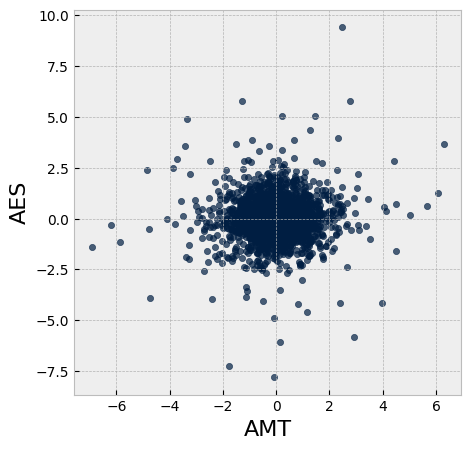

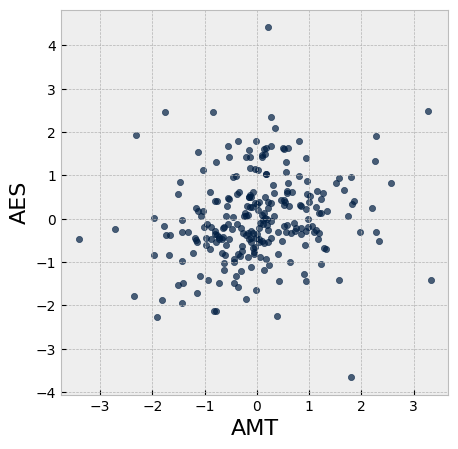

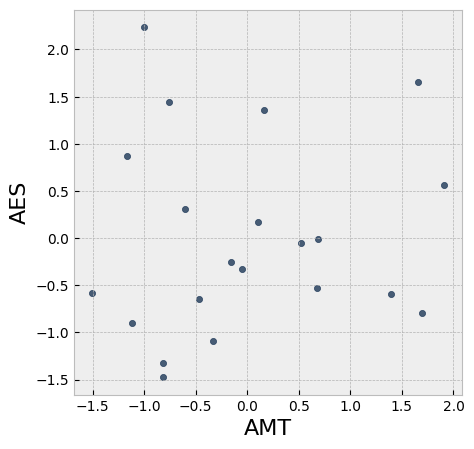

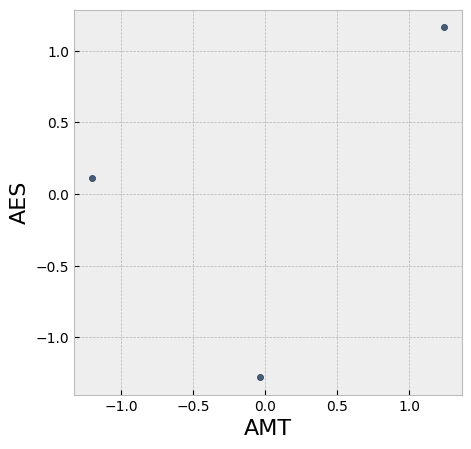

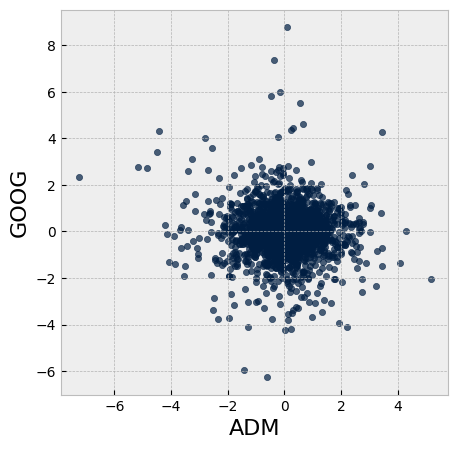

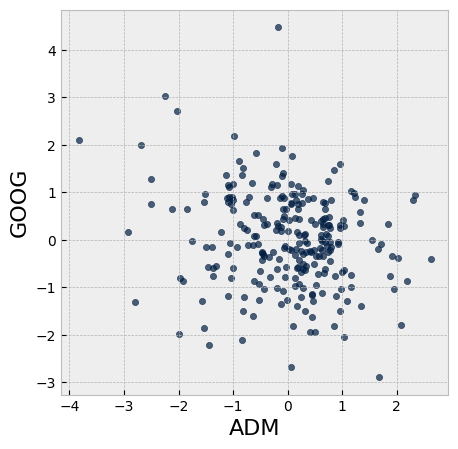

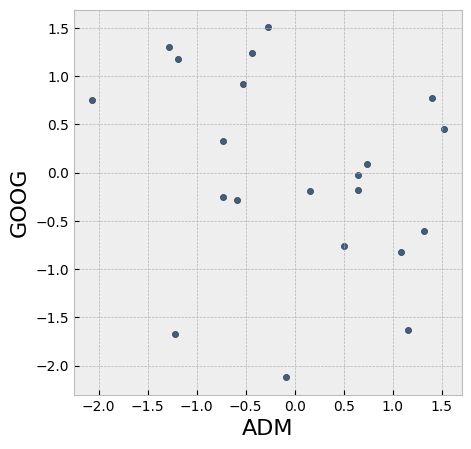

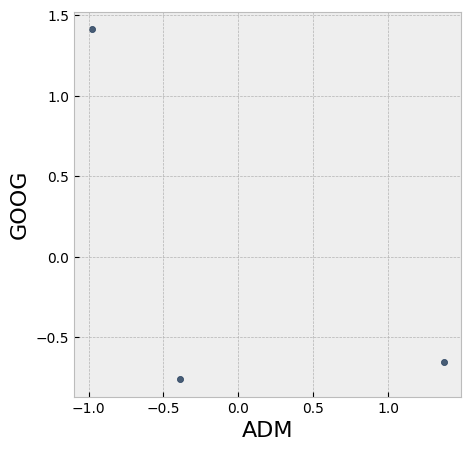

In [19]:
def successes(stock_a, stock_b, period, interval, n, stdevs):
    
    # Get data
    if 1==1:
        stock_a_hist = historical(stock_a, period, interval, "date")
        stock_b_hist = historical(stock_b, period, interval, "date")

        # Convert to percentage & standardize
        stock_a_perc = stock_price_to_percent(stock_a_hist)
        stock_b_perc = stock_price_to_percent(stock_b_hist)
    
        # Offset by n units
        stock_a_offset = stock_a_perc[:len(stock_a_perc)-n]
        stock_b_offset = stock_b_perc[n:]

        stock_a_std = standardize(stock_a_offset)
        stock_b_std = standardize(stock_b_offset)
    
        stock_compared = Table().with_columns(stock_a, stock_a_std, stock_b, stock_b_std)
        
        
        stock_a_successes = stock_compared.where(stock_a, are.above(1))
        stock_compared.scatter(stock_a)
    
        if stock_a_successes.num_rows >= 1:
            successes = stock_a_successes.where(stock_b, are.above(0)).num_rows / stock_a_successes.num_rows
            return successes, stock_a_successes.where(stock_b, are.above(0)).num_rows, stock_a_successes.num_rows
        else:
            return "no events"
    
    else:
        return "nan"
    
print(successes("AMT", "AES", "10y", "1d", 1, 1))
print(successes("AMT", "AES", "1y", "1d", 1, 1))
print(successes("AMT", "AES", "1mo", "1d", 1, 1))
print(successes("AMT", "AES", "1wk", "1d", 1, 1))

print(successes("ADM", "GOOG", "10y", "1d", 1, 1))
print(successes("ADM", "GOOG", "1y", "1d", 1, 1))
print(successes("ADM", "GOOG", "1mo", "1d", 1, 1))
print(successes("ADM", "GOOG", "1wk", "1d", 1, 1))

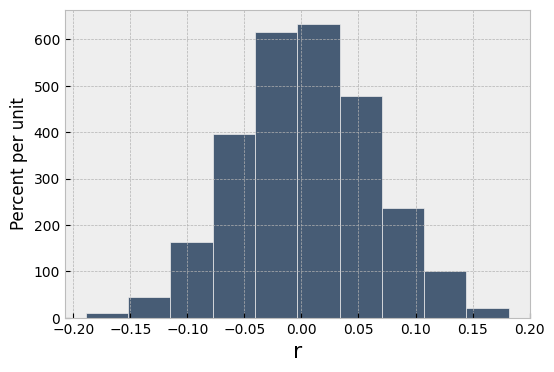

In [15]:
all_correlations.where("r", are.not_equal_to("nan")).hist("r")